In [87]:
# Question 1 -- PCA

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy.optimize import linear_sum_assignment
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from IPython.display import Image


df = pd.read_csv("Iris.csv")

# Separating out the features

df1 = df.copy()
del df1["Species"]
x = df1.values

# Separating out the target

y = df["Species"].values

# Standardizing the features

# x = StandardScaler().fit_transform(x)
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents,columns = ['principal component 1','principal component 2'])
finalDf = pd.concat([principalDf, df[['Species']]], axis = 1)
print(finalDf)

     principal component 1  principal component 2         Species
0                -2.684207               0.326607     Iris-setosa
1                -2.715391              -0.169557     Iris-setosa
2                -2.889820              -0.137346     Iris-setosa
3                -2.746437              -0.311124     Iris-setosa
4                -2.728593               0.333925     Iris-setosa
..                     ...                    ...             ...
145               1.944017               0.187415  Iris-virginica
146               1.525664              -0.375021  Iris-virginica
147               1.764046               0.078519  Iris-virginica
148               1.901629               0.115877  Iris-virginica
149               1.389666              -0.282887  Iris-virginica

[150 rows x 3 columns]


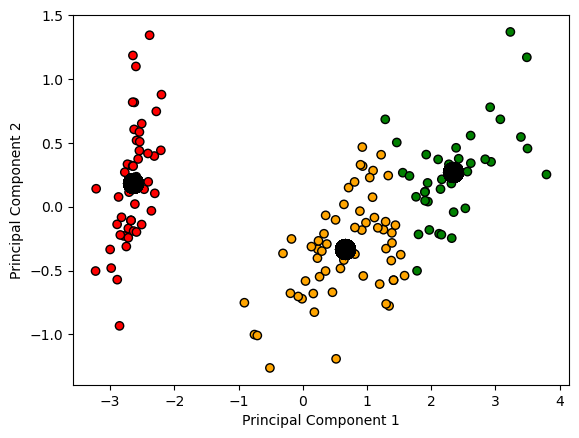

47.16766917263267
The purity score is: 0.8866666666666667


In [88]:
# Question 2 -- K mean with k = 3

warnings.filterwarnings("ignore") # to avoid the warnings which come from changing the database

df = finalDf
kmeans = KMeans(n_clusters = 3, random_state = 0)
df['cluster'] = kmeans.fit_predict(df[['principal component 1', 'principal component 2']])

# get centroids

centroids = kmeans.cluster_centers_ # find all the cluster centers
cen_x = [i[0] for i in centroids] # get the x value of cluster center
cen_y = [i[1] for i in centroids] # get the y value of cluster center

# add to df

df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]}) # adding the cluster center x value as a column for each data point
df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]}) # adding the cluster center y value as a column for each data point


# define and map colors

colors = ['red','green','orange']
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

plt.scatter(df["principal component 1"], df["principal component 2"], c = df.c,edgecolor = "black")
plt.scatter(df['cen_x'],df['cen_y'],color = "black",marker = "o",s=200)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

dis = 0 # getting the distortion measure
for i in range(len(df)):
    dis_x = 0 # getting the x distance
    dis_y = 0 # getting the y distance
    dis_x = df["principal component 1"][i]-df["cen_x"][i]
    dis_x = df["principal component 2"][i]-df["cen_y"][i]
    dis += (dis_x**2+dis_y**2)**(1/2) # obtaining the total distance
print(dis)

def purity_score(y_true, y_pred):
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred) # compute contingency matrix (also called confusion matrix)
    # print(contingency_matrix)
    row_ind, col_ind = linear_sum_assignment(-contingency_matrix) # Find optimal one-to-one mapping between cluster labels and true labels
    return contingency_matrix[row_ind,col_ind].sum()/np.sum(contingency_matrix) # return cluster accuracy
    
df = df.assign(Species_numeral = 'NAN')

for i in range(len(df)): # changing species to numeric values
    if(df["Species"][i] == "Iris-setosa"):
        df["Species_numeral"][i] = 0
        
    if(df["Species"][i] == "Iris-versicolor"):
        df["Species_numeral"][i] = 1
    
    if(df["Species"][i] == "Iris-virginica"):
        df["Species_numeral"][i] = 2

print("The purity score is:",end = " ")        
print(purity_score(df["cluster"],df["Species_numeral"]))

The distortion measure for number of clusters 2 is 117.69146927566925
The distortion measure for number of clusters 3 is 83.71374497459871
The distortion measure for number of clusters 4 is 70.24439055869564
The distortion measure for number of clusters 5 is 62.06916708359969
The distortion measure for number of clusters 6 is 54.42762986007439
The distortion measure for number of clusters 7 is 49.57152857388883


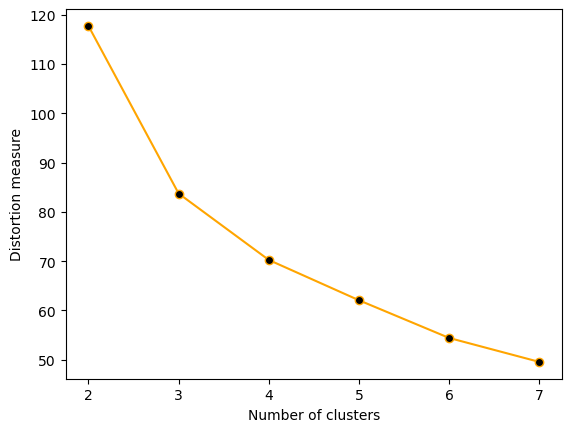

The purity score for K value as 2 is 0.6666666666666666
The purity score for K value as 3 is 0.8866666666666667
The purity score for K value as 4 is 0.6866666666666666
The purity score for K value as 5 is 0.68
The purity score for K value as 6 is 0.5133333333333333
The purity score for K value as 7 is 0.5


In [89]:
# Question 3 -- K mean clustering for different k values

#creating a function for distortion measure
def distortion(k):
    kmeans = KMeans(n_clusters = k, random_state = 0)
    df['cluster'] = kmeans.fit_predict(df[['principal component 1', 'principal component 2']])
    centroids = kmeans.cluster_centers_
    cen_x = [i[0] for i in centroids] 
    cen_y = [i[1] for i in centroids]
    df['cen_x'] = df.cluster.map({i:cen_x[i] for i in range(k)})
    df['cen_y'] = df.cluster.map({i:cen_y[i] for i in range(k)})
    dis = 0
    for i in range(len(df)):
        dis_x = 0
        dis_y = 0
        dis_x = df["principal component 1"][i]-df["cen_x"][i]
        dis_y = df["principal component 2"][i]-df["cen_y"][i]
        dis += (dis_x**2+dis_y**2)**(1/2)
    return (dis)


k_vals = [2,3,4,5,6,7]
distortion_values = []


for i in k_vals:
    distortion_values.append(distortion(i))
    print("The distortion measure for number of clusters",i,"is",distortion(i))


plt.plot(k_vals,distortion_values,marker = "o",markerfacecolor='black',color = "orange")
plt.xlabel("Number of clusters")
plt.ylabel("Distortion measure")
plt.show()


# The curve looks like an elbow. 
# In the above plot, the elbow is at k = 3. 
# Sum of squared distances falls suddenly indicating the optimal k for this dataset is 3.


for i in k_vals:
    distortion(i)
    print("The purity score for K value as",i,"is",purity_score(df["cluster"],df["Species_numeral"]))

In [90]:
# deleting the new columns introduced by us
del df["cluster"]
del df["cen_x"]
del df["cen_y"]
del df["c"]
del df["Species_numeral"]
print(df)

     principal component 1  principal component 2         Species
0                -2.684207               0.326607     Iris-setosa
1                -2.715391              -0.169557     Iris-setosa
2                -2.889820              -0.137346     Iris-setosa
3                -2.746437              -0.311124     Iris-setosa
4                -2.728593               0.333925     Iris-setosa
..                     ...                    ...             ...
145               1.944017               0.187415  Iris-virginica
146               1.525664              -0.375021  Iris-virginica
147               1.764046               0.078519  Iris-virginica
148               1.901629               0.115877  Iris-virginica
149               1.389666              -0.282887  Iris-virginica

[150 rows x 3 columns]


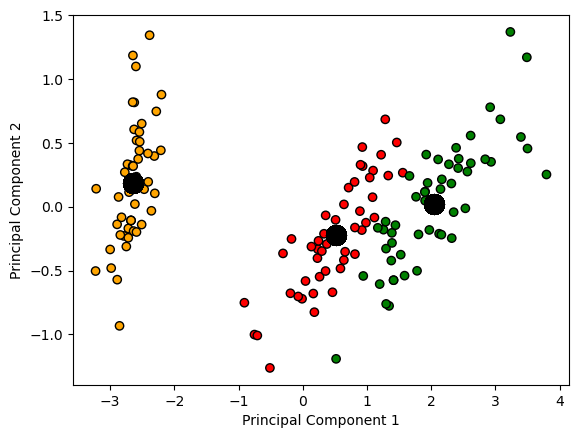

The value of  total data log likelihood at the last iteration of the GMM as distortion measure is -1.8724637669671973
The Purity score is 0.98


In [91]:
# Question 4 -- GMM clustering

gmm = GaussianMixture(n_components = 3)
gmm.fit(df[['principal component 1', 'principal component 2']])
df["GMM_cluster"] = gmm.predict(df[['principal component 1', 'principal component 2']])


 # print(df["GMM_cluster"])
centroids = gmm.means_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]


 # add to df
df['cen_x'] = df.GMM_cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
df['cen_y'] = df.GMM_cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
colors = ['red', 'orange', 'green']
df['c'] = df.GMM_cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})


plt.scatter(df["principal component 1"], df["principal component 2"], c = df.c,edgecolor = 'black')
plt.scatter(df['cen_x'],df['cen_y'],color = "black",marker = "o",s=200)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


df = df.assign(Species_numeral = 'NAN')

for i in range(len(df)):
    if(df["Species"][i] == "Iris-setosa"):
        df["Species_numeral"][i] = df["GMM_cluster"][0:50].mode().values[0]

    if(df["Species"][i] == "Iris-versicolor"):
        df["Species_numeral"][i] = df["GMM_cluster"][50:100].mode().values[0]

    if(df["Species"][i] == "Iris-virginica"):
        df["Species_numeral"][i] = df["GMM_cluster"][100:].mode().values[0]

k = gmm.score(df[['principal component 1', 'principal component 2']]).sum()

print("The value of  total data log likelihood at the last iteration of the GMM as distortion measure is",k)
print("The Purity score is",purity_score(df["GMM_cluster"],df["Species_numeral"]))

The distortion measure for number of clusters 2 is -1.9251154376513213
The distortion measure for number of clusters 3 is -1.8724637669671973
The distortion measure for number of clusters 4 is -1.8762587933403847
The distortion measure for number of clusters 5 is -1.814954318881159
The distortion measure for number of clusters 6 is -1.7508969576337832
The distortion measure for number of clusters 7 is -1.7589158546285852


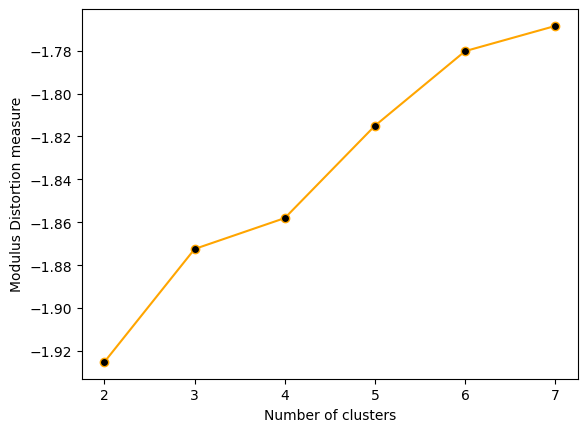

The purity score for K value as 2 is 0.66
The purity score for K value as 3 is 0.98
The purity score for K value as 4 is 0.76
The purity score for K value as 5 is 0.7333333333333333
The purity score for K value as 6 is 0.64
The purity score for K value as 7 is 0.5733333333333334


In [102]:
# Question 5 -- Distortion measure for GMM 

def GMMdistortion(k):
    gm = GaussianMixture(n_components = k)
    gm.fit(df[['principal component 1', 'principal component 2']])
    df["GMM_cluster"] = gm.predict(df[['principal component 1', 'principal component 2']])
    for i in range(len(df)):
        if(k>2):
            if(df["Species"][i] == "Iris-setosa"):
                df["Species_numeral"][i] = df["GMM_cluster"][0:50].mode().values[0]

            if(df["Species"][i] == "Iris-versicolor"):
                df["Species_numeral"][i] = df["GMM_cluster"][50:100].mode().values[0]

            if(df["Species"][i] == "Iris-virginica"):
                df["Species_numeral"][i] = df["GMM_cluster"][100:].mode().values[0]

        k = gm.score(df[['principal component 1', 'principal component 2']]).sum()
    return k

l = [2,3,4,5,6,7]

distortion_values = []
for i in l:
    distortion_values.append(GMMdistortion(i))
    print("The distortion measure for number of clusters",i,"is",GMMdistortion(i))


plt.plot(l,distortion_values,marker = "o",color = "orange",markerfacecolor='black')
plt.xlabel("Number of clusters")
plt.ylabel("Modulus Distortion measure")
plt.show()

for i in l:
    GMMdistortion(i)
    print("The purity score for K value as",i,"is",purity_score(df["GMM_cluster"],df["Species_numeral"]))

In [93]:
del df["GMM_cluster"]
del df["cen_x"]
del df["cen_y"]
del df["c"]
del df["Species_numeral"]
print(df)

     principal component 1  principal component 2         Species
0                -2.684207               0.326607     Iris-setosa
1                -2.715391              -0.169557     Iris-setosa
2                -2.889820              -0.137346     Iris-setosa
3                -2.746437              -0.311124     Iris-setosa
4                -2.728593               0.333925     Iris-setosa
..                     ...                    ...             ...
145               1.944017               0.187415  Iris-virginica
146               1.525664              -0.375021  Iris-virginica
147               1.764046               0.078519  Iris-virginica
148               1.901629               0.115877  Iris-virginica
149               1.389666              -0.282887  Iris-virginica

[150 rows x 3 columns]


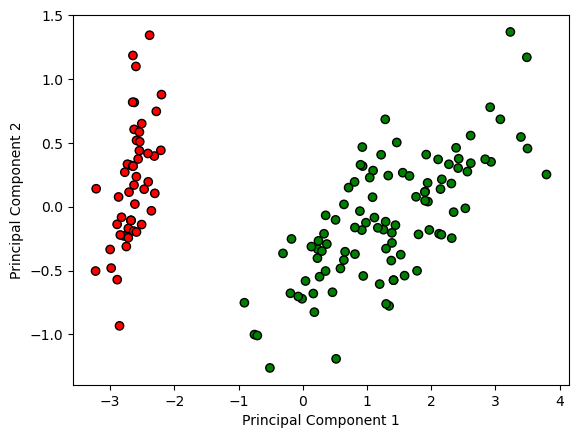

The purity score for radius value as 1 and threshold points as 4 is 0.6666666666666666


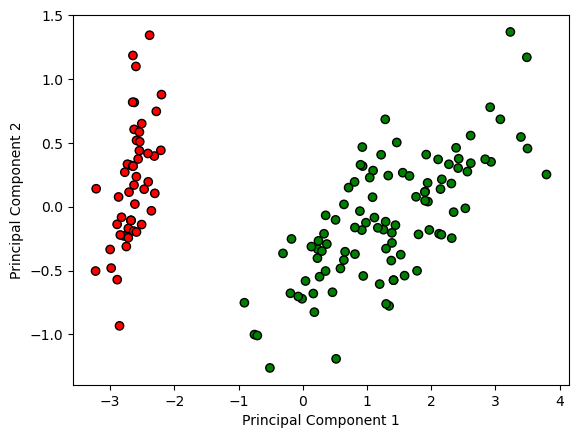

The purity score for radius value as 1 and threshold points as 10 is 0.6666666666666666


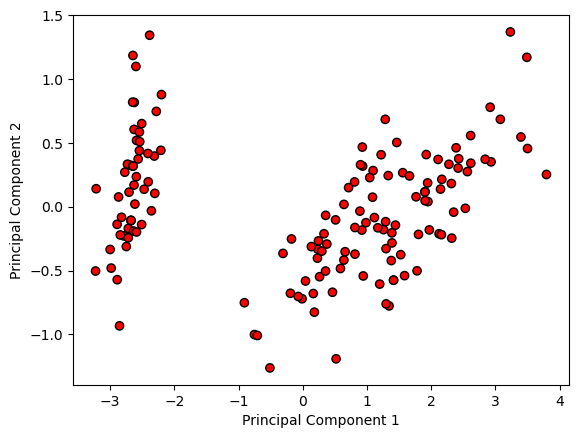

The purity score for radius value as 5 and threshold points as 4 is 0.3333333333333333


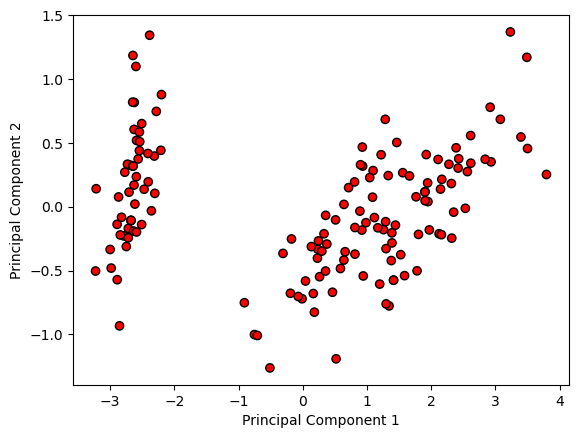

The purity score for radius value as 5 and threshold points as 10 is 0.3333333333333333


In [94]:
# Question 6 -- DBSCAN

df = df.assign(Species_numeral = 'NAN')

for i in range(len(df)):
    if(df["Species"][i] == "Iris-setosa"):
        df["Species_numeral"][i] = 0

    if(df["Species"][i] == "Iris-versicolor"):
        df["Species_numeral"][i] = 1

    if(df["Species"][i] == "Iris-virginica"):
        df["Species_numeral"][i] = 2

eps_meansample = [[1,4],[1,10],[5,4],[5,10]]
for i in range(len(eps_meansample)):
    
    dbscan_model = DBSCAN(eps = eps_meansample[i][0], min_samples = eps_meansample[i][1]).fit(df[['principal component 1', 'principal component 2']])
    df["DBSCAN_predictions"] = dbscan_model.labels_
    k = df["DBSCAN_predictions"].unique()
    colors = ['red', 'green', 'orange']
    df['c'] = df.DBSCAN_predictions.map({i:colors[i] for i in range(len(k))})

    plt.scatter(df["principal component 1"], df["principal component 2"], c = df.c , edgecolor = 'black')
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.show()
    print("The purity score for radius value as",eps_meansample[i][0],"and threshold points as",eps_meansample[i][1],"is",purity_score(df["DBSCAN_predictions"],df["Species_numeral"]))
    